#Importaciones

Comencemos con nuestras importaciones. Aquí estamos importando TensorFlow y lo llamamos tf para facilitar su uso.

Luego importamos una biblioteca llamada numpy, que nos ayuda a representar nuestros datos de manera fácil y rápida.

El framework para definir una red neuronal como un conjunto de capas secuenciales se llama keras, por lo que también lo importamos.


In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.activations import sigmoid

#Proporcionar los datos

A continuación, incluiremos algunos datos. En este caso, estamos tomando 6 xs y 6 ys. Puede ver que la relación entre estos es que y = 2x-1, entonces donde x = -1, y = -3 etc.

Una biblioteca de Python llamada 'Numpy' proporciona muchas estructuras de datos de tipo matriz. Declaramos que queremos usarlos especificando los valores como np.array []

In [28]:
x = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

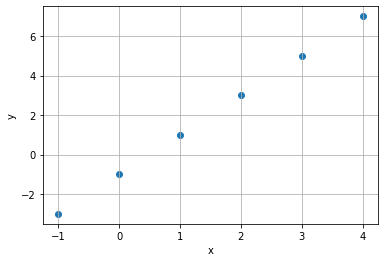

In [29]:
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.grid()

#Definir y compilar la red neuronal
A continuación, crearemos la red neuronal más simple posible. Tiene 1 capa, y esa capa tiene 1 neurona, y la forma de entrada es solo 1 valor.

In [30]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])
                             ])

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [6]:
model = Sequential([Dense(units=1, input_shape=[1])])

In [32]:
model = tf.keras.Sequential()

model.add( Dense(1, input_shape=(1,)) )

Ahora compilamos nuestra red neuronal. Cuando lo hacemos, tenemos que especificar 2 funciones, una pérdida y un optimizador.

Si ha visto muchas matemáticas para el aprendizaje automático, aquí es donde se usa generalmente, pero en este caso está muy bien encapsulado en funciones para usted. Pero qué pasa aquí, expliquemos ...

Sabemos que en nuestra función, la relación entre los números es y = 2x-1.

Cuando la computadora está tratando de 'aprender' eso, hace una suposición ... tal vez y = 10x + 10. La función LOSS mide las respuestas adivinadas contra las respuestas correctas conocidas y mide qué tan bien o qué tan mal lo hizo.

Luego usa la función OPTIMIZER para hacer otra conjetura. Según cómo fue la función de pérdida, intentará minimizar la pérdida. En ese punto, tal vez se le ocurra algo como y = 5x + 5, que, aunque sigue siendo bastante malo, está más cerca del resultado correcto (es decir, la pérdida es menor)

Repetirá esto para el número de EPOCHS que verá en breve. Pero primero, así es como le decimos que use 'ERROR AL CUADRADO MEDIO' para la pérdida y 'DESCENSO DE GRADIENTE ESTOCÁSTICO' para el optimizador. 

Con el tiempo, aprenderá las diferentes y apropiadas funciones de optimización y pérdida para diferentes escenarios.

In [33]:
model.compile(optimizer='sgd', loss='mean_squared_error')


#Entrenamiento de la red neuronal
El proceso de entrenamiento de la red neuronal, donde "aprende" la relación entre las X y las Y, está en model.fit. Aquí es donde pasará por el bucle del que hablamos anteriormente, haciendo una suposición, midiendo qué tan bueno o malo es (también conocido como la pérdida), usando el optimizador para hacer otra suposición, etc. Lo hará por la cantidad de épocas que usted especifica. Cuando ejecute este código, verá la pérdida en el lado derecho.

In [35]:
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 4ms/step - loss: 2.3325e-05
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 2.2847e-05
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2377e-05
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 2.1917e-05
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1467e-05
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1026e-05
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0594e-05
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0171e-05
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9757e-05
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 1.9351e-05
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8954e-05
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 1.8565e-05
Epoch 13/500


Ahora tienemos un modelo que ha sido entrenado para aprender la relación entre X e Y. Puedemos usar el método model.predict para que averigüe la Y para una X. Entonces, por ejemplo, si X = 10 , ¿cuál crees que será Y? Adivine antes de ejecutar este código:

In [36]:
x_prueba = np.array([10.0])
print(x_prueba)

[10.]


In [37]:
y_pred = model.predict(x_prueba)
print(y_pred)

[[18.999916]]


Predecir para X = -2, 0, 2 , 4, 8

In [38]:
x_prueba = np.array([-2, 0, 2 , 4, 8], dtype=float)
print(x_prueba)

[-2.  0.  2.  4.  8.]


In [13]:
y_pred = model.predict(x_prueba)
print(y_pred)

[[-4.98953  ]
 [-0.9936357]
 [ 3.0022588]
 [ 6.998153 ]
 [14.989942 ]]


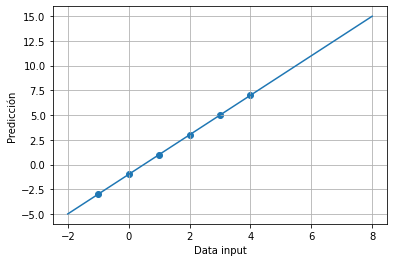

In [14]:
plt.scatter(x,y)
plt.plot(x_prueba, y_pred)
plt.xlabel('Data input')
plt.ylabel('Predicción')
plt.grid()

#Caso no lineal

In [39]:
x = np.array([-3,  -2, -1, 0, 1, 2, 3], dtype=float)
y = np.array([0.1,0.2,0.5, 1,0.5,0.2,0.1], dtype=float)

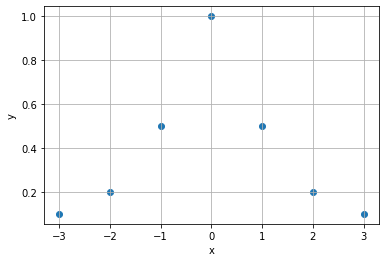

In [40]:
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.grid()

In [41]:
model = Sequential([Dense(units=2, activation=sigmoid, input_shape=[1]),
                    Dense(units=2, activation=sigmoid),
                    Dense(units=1) ])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=tf.keras.losses.MeanSquaredError())


In [19]:
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 292ms/step - loss: 0.6090
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2704
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1164
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1128
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1796
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2308
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2338
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2003
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1540
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1145
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0917
Epoch 13/500
1/1 [==============================] - 0s 4ms

In [20]:
x_prueba = np.array([-3,  -2, -1, 0, 1, 2, 3], dtype=float)
print(x_prueba)

[-3. -2. -1.  0.  1.  2.  3.]


In [21]:
y_pred = model.predict(x_prueba)
y_pred

array([[0.1310732 ],
       [0.16417173],
       [0.5084586 ],
       [0.99269867],
       [0.5086632 ],
       [0.16455588],
       [0.12974879]], dtype=float32)

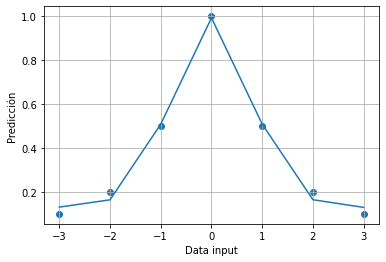

In [22]:
plt.scatter(x,y)
plt.plot(x_prueba, y_pred)
plt.xlabel('Data input')
plt.ylabel('Predicción')
plt.grid()